In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm

In [122]:
df = pd.read_csv("loan.csv")

In [123]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Skewness: -0.19299810452881644


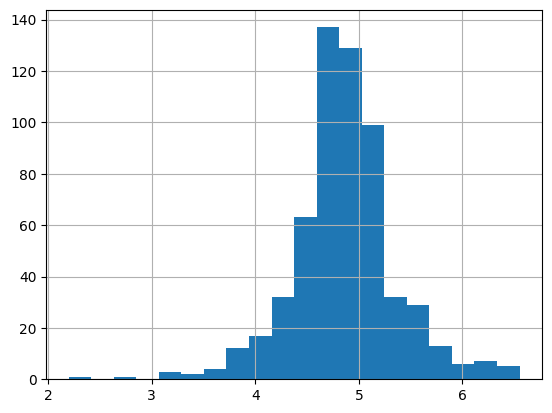

In [126]:
# right-skewed distribution.
# it means that there are more loans with lower values.

df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins = 20)
skewness = df['LoanAmount_log'].skew()

print(f"Skewness: {skewness}")

In [127]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

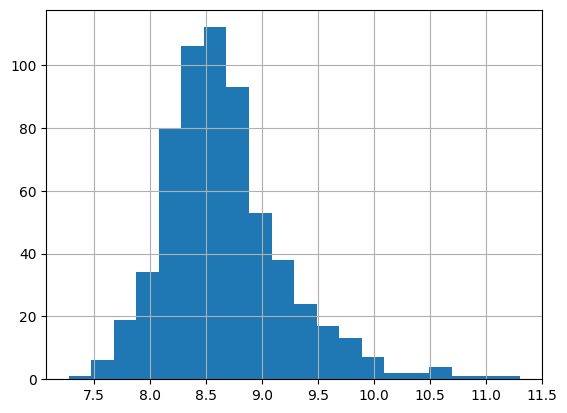

In [128]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins = 20)

In [129]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
df["Married"].fillna(df["Married"].mode()[0],inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace = True)

df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace = True)
df["LoanAmount_log"].fillna(df["LoanAmount_log"].mean(),inplace = True)

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace = True)


/tmp/ipykernel_7559/3829774183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
/tmp/ipykernel_7559/3829774183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [130]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [131]:
print("Loan Amount:\n")
print("Mean:",np.mean(df['LoanAmount']))
print("Median:",np.median(df['LoanAmount']))
print("Standard Devitation:",np.std(df['LoanAmount']))
print("Variance:",np.var(df['LoanAmount']))
print("Minimum value:",np.min(df['LoanAmount']))
print("Maximum value:",np.max(df['LoanAmount']))
print("Average:",np.average(df['LoanAmount']))

Loan Amount:

Mean: 146.41216216216216
Median: 129.0
Standard Devitation: 83.9690053763677
Variance: 7050.793863896469
Minimum value: 9.0
Maximum value: 700.0
Average: 146.41216216216216


In [132]:
print("Total Income:\n")
print("Mean:",np.mean(df['TotalIncome']))
print("Median:",np.median(df['TotalIncome']))
print("Standard devitation:",np.std(df['TotalIncome']))
print("Variance:",np.var(df['TotalIncome']))
print("Minimum value:",np.min(df['TotalIncome']))
print("Maximum value:",np.max(df['TotalIncome']))
print("Average:",np.average(df['TotalIncome']))

Total Income:

Mean: 7024.705081414722
Median: 5416.5
Standard devitation: 6453.402230691897
Variance: 41646400.351099156
Minimum value: 1442.0
Maximum value: 81000.0
Average: 7024.705081414722


In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.495995,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.857444,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


In [134]:
# column x shows selected columns
#column y shows loan_status
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [135]:
# these are the factors whether loan will be approved or not
#checking columns of x
selected_columns = df.columns[np.r_[1:5, 9:11, 13:15]]
print(selected_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term',
       'Credit_History', 'LoanAmount_log', 'TotalIncome'],
      dtype='object')


In [136]:

target_column = df.columns[12]
print(target_column)



Loan_Status


In [137]:

print("Percentage of missing gender is %2f%%" %((df["Gender"].isnull().sum()/df.shape[0])*100))

Percentage of missing gender is 0.000000%


Number of People who take loan as Group by Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


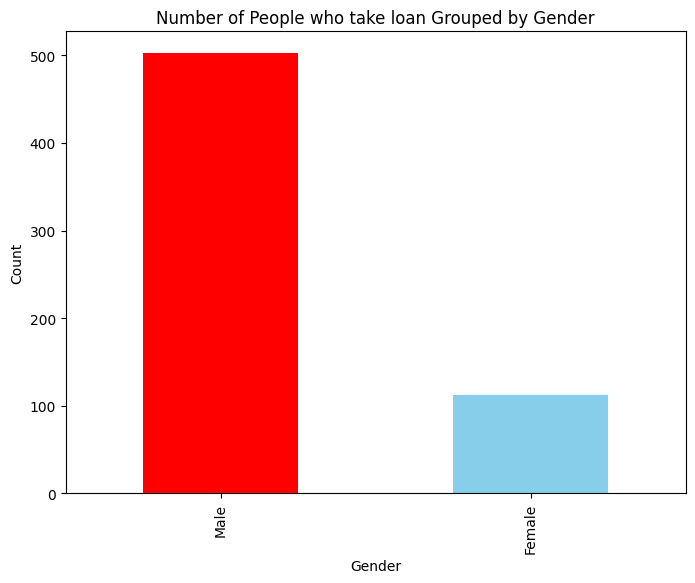

In [138]:
#value.counts() gives values of each gender in the dataset
print("Number of People who take loan as Group by Gender:")
print(df["Gender"].value_counts())

plt.figure(figsize=(8, 6))
df["Gender"].value_counts().plot(kind='bar', color=('red','skyblue'))
plt.title("Number of People who take loan Grouped by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Number of People who take loan as Group by Marital Status:
Married
Yes    401
No     213
Name: count, dtype: int64


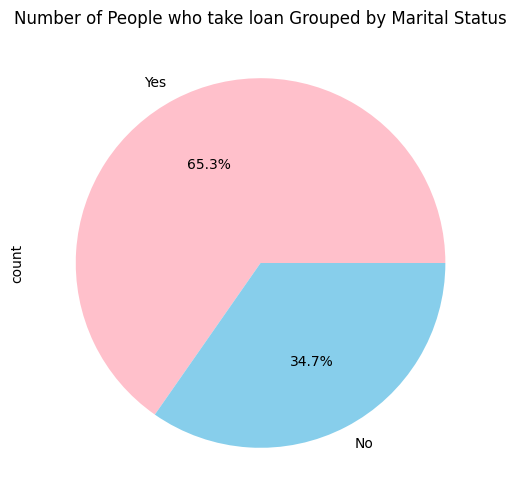

In [139]:
#value.counts() gives values of each gender in the dataset
print("Number of People who take loan as Group by Marital Status:")
print(df["Married"].value_counts())

plt.figure(figsize=(8, 6))
df["Married"].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=('pink','skyblue'))
plt.title("Number of People who take loan Grouped by Marital Status")
plt.show()


Number of People who take loan as Group by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


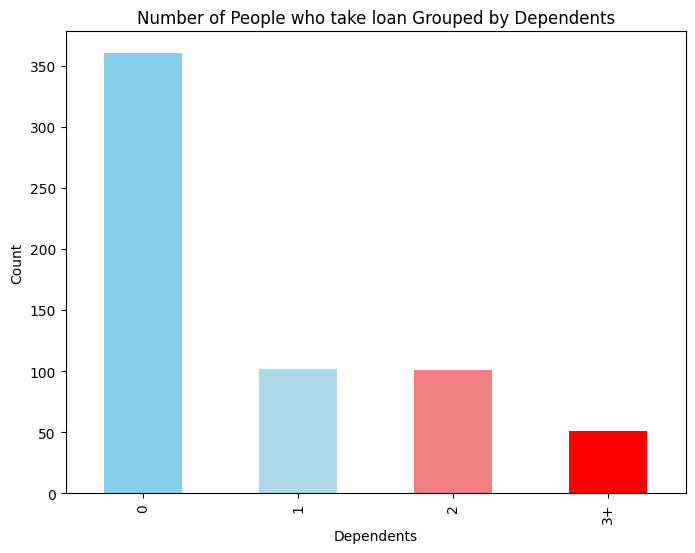

In [140]:
print("Number of People who take loan as Group by Dependents")
print(df["Dependents"].value_counts())

plt.figure(figsize=(8, 6))
df["Dependents"].value_counts().plot(kind='bar', color=['skyblue', 'lightblue', 'lightcoral', 'red'])
plt.title("Number of People who take loan Grouped by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()


Number of People who take loan as Group by Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


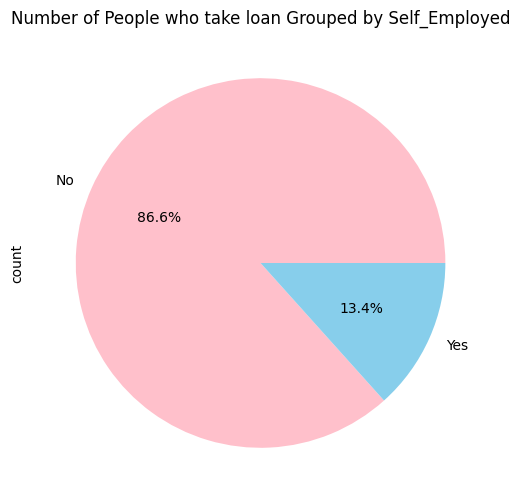

In [141]:
print("Number of People who take loan as Group by Self_Employed")
print(df["Self_Employed"].value_counts())

plt.figure(figsize=(8, 6))
df["Self_Employed"].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=('pink','skyblue'))
plt.title("Number of People who take loan Grouped by Self_Employed")
plt.show()


Number of People who take loan as Group by LoanAmount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


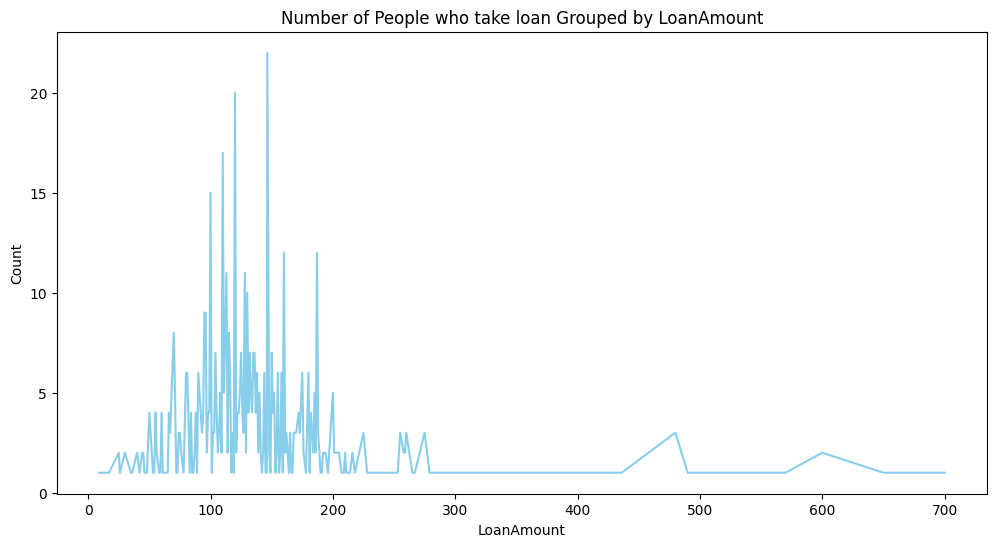

In [142]:
print("Number of People who take loan as Group by LoanAmount")
print(df["LoanAmount"].value_counts())

plt.figure(figsize=(12,6))
df["LoanAmount"].value_counts().sort_index().plot(kind='line', color=('skyblue'))
plt.title("Number of People who take loan Grouped by LoanAmount")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()

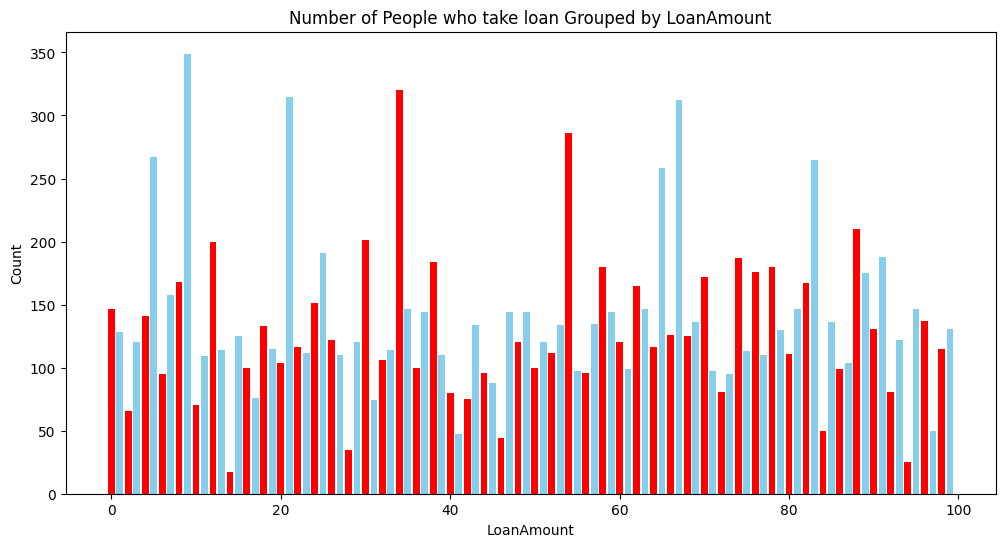

[146.41216216 128.          66.         120.         141.
 267.          95.         158.         168.         349.
  70.         109.         200.         114.          17.
 125.         100.          76.         133.         115.
 104.         315.         116.         112.         151.
 191.         122.         110.          35.         120.
 201.          74.         106.         114.         320.
 146.41216216 100.         144.         184.         110.
  80.          47.          75.         134.          96.
  88.          44.         144.         120.         144.
 100.         120.         112.         134.         286.
  97.          96.         135.         180.         144.
 120.          99.         165.         146.41216216 116.
 258.         126.         312.         125.         136.
 172.          97.          81.          95.         187.
 113.         176.         110.         180.         130.
 111.         146.41216216 167.         265.          50.
 136.         

In [143]:
arr=df['LoanAmount'].values
t=arr[0:100]

plt.figure(figsize=(12,6))
plt.bar(range(len(t)), t, color=('red', 'skyblue'))
plt.title("Number of People who take loan Grouped by LoanAmount")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()
print(t)

Number of People who take loan as Group by Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


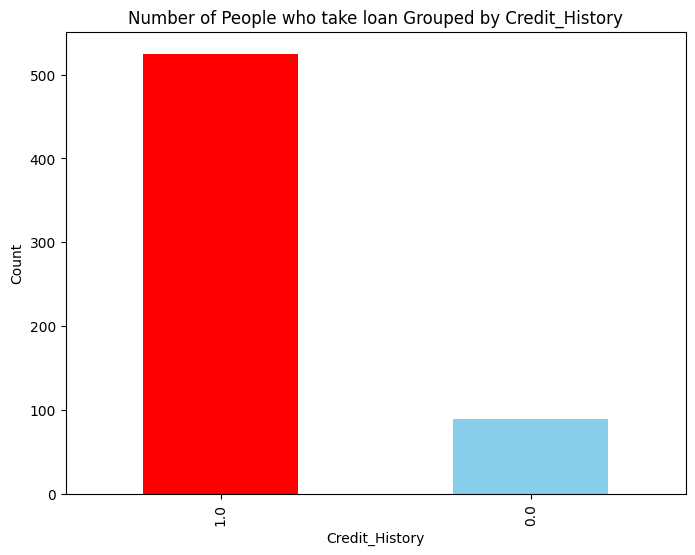

In [144]:
print("Number of People who take loan as Group by Credit_History")
print(df["Credit_History"].value_counts())

plt.figure(figsize=(8, 6))
df["Credit_History"].value_counts().plot(kind='bar', color=('red','skyblue'))
plt.title("Number of People who take loan Grouped by Credit_History")
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()


In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [146]:
for i in range(0,4):
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [147]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [148]:
for i in range(0,4):
    X_test[:,i] = Labelencoder_x.fit_transform(X_test[:,i])

X_test
    

array([[1, 0, 0, 0, 360.0, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 360.0, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 360.0, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 360.0, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 360.0, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 180.0, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 180.0, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 360.0, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 360.0, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 360.0, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 360.0, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 360.0, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 360.0, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 360.0, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 360.0, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 360.0, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 360.0, 1.0, 5.247

In [149]:
labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [150]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.03484798, -0.18578759],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.41790088,
         0.83102078,  0.59265746],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -2.39291191,
         0.28925857, -0.21134115],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.41790088,
         0.87094174,  0.17167345],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.43000557, -0.16052278],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.41790088,
         0.68458193, -0.095123  ]])

In [153]:
from sklearn import datasets, linear_model, metrics

regression= linear_model.LogisticRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
print("Logistic Regression model accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
y_pred

Logistic Regression model accuracy: 82.92682926829268 %


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [156]:
# from sklearn.neighbors import KNeighborsClassifier
# kn_clf = KNeighborsClassifier()

# kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [157]:
# y_pred = dt_clf.predict(X_test)
# print("Accuracy of KN is: ", metrics.accuracy_score(y_pred,y_test))

# y_pred

Accuracy of KN is:  0.6910569105691057


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])